In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import math 
import os

df= pd.read_csv("concatenated_data_2.csv")
df

### data exploration 

In [3]:
df.open_close.unique()
df.info()
df.describe()
df.isna().sum(axis = 0)
df.head()

array(['CLOSED NOW'], dtype=object)

In [9]:
df.rating.replace(np.nan, 0, inplace = True)
df.reviews.replace(np.nan, 0, inplace = True)
df.reviews = [math.floor(i) for i in df.reviews]

### changing dtpypes

In [15]:
df.reviews.astype("int")
df.rating = pd.to_numeric(df.rating)
df.phone.astype("str")
df["price range"].astype("str")
df.open_close.astype("str")

0        11
1        20
2         0
3        15
4       174
       ... 
1615      0
1616     13
1617      0
1618      3
1619      6
Name: reviews, Length: 1620, dtype: int64

In [30]:
#rep: how many cafés per area
cafe_area = df.groupby("location")[["address"]].count()
cafe_area

,address
location,
"Los Angeles, CA 90005",108
"Los Angeles, CA 90010",54
"Los Angeles, CA 90012",216
"Los Angeles, CA 90013",108
"Los Angeles, CA 90014",54
"Los Angeles, CA 90020",162
"Los Angeles, CA 90021",54
"Los Angeles, CA 90025",54
"Los Angeles, CA 90026",54


### handling missing values 

In [31]:
df.category.fillna("Not categorized", inplace = True)
df["price range"].fillna("-", inplace = True)

In [35]:
df.open_close = df.open_close.str.replace("OPEN 24 Hours", "Open 24 Hours")
df.open_close = df.open_close.str.replace("CLOSED NOW", "Closed Now")
df.open_close = df.open_close.str.replace("OPEN NOW", "Open Now")
df.fillna("Undetermined", inplace = True)

### defining and arranging categorical columns

In [ ]:
def extract_location(location):
    city, state_postal = location.split(', ')
    state, postal = state_postal.split(' ')
    return city, state, postal

# Apply the extract_location function to the location column
#df['location'].apply(extract_location).apply(pd.Series)

[extract_location(i) for i in df.location]

city = []
state = []
postal = []

for x,y,z in [extract_location(i) for i in df.location]:
    city.append(x)
    state.append(y)
    postal.append(z)
    
df["city"] = city
df["state"] = state
df["postal"] = postal 

df.postal.astype("int")

In [37]:
#function to categorize according to prices and create new column

def prices(string):
    if string == "$":
        return "Cheap Eats"
    elif string == "$$":
        return "Mid-range"
    elif string == "$$$":
        return "Fine Dining"
    else:
        return "Not categorized"

#new rating system, stars rating 
df['stars rating'] = [round(i/2) for i in df.rating]

### create `new df` for the different categories 

In [39]:
category_prices = [prices(i) for i in df["price range"]]
df["categorical prices"] = category_prices

In [41]:
bakeries = df.loc[df.category.str.contains("Bakeries")]
familiar = df.loc[df.category.str.contains("Family Style")]
take_out = df.loc[df.category.str.contains("Take Out")]
open_24 = df.loc[df.open_close == 'Open 24 Hours']
dining = df.loc[df["categorical prices"] == "Fine Dining"]

In [46]:
df["address"].value_counts()

Swork Coffee                   54
Groundwork Coffee Co.          54
Caffe Vita                     54
Caffe Bene                     54
Cafe De Leche                  54
Klat                           54
Blue Bottle Coffee             54
Groundwork Coffee              54
Iota Brew Cafe                 54
Cafe Loft                      54
Sul N Beans                    54
Holy Grounds Coffee & Tea      54
Cafe Demitasse                 54
Cafe Dulce                     54
Kaldi Coffee & Tea             54
Starbucks Coffee               54
Urth Caffe                     54
Bon Vivant Market & Cafe       54
Broome Street General Store    54
Suehiro Cafe                   54
Stumptown Coffee               54
Pann's Restaurant              54
Haus by coffee hunter          54
Alterations at Nordstrom       54
House of Pies                  54
Lazy Daisy Cafe                54
Figaro Bistrot                 54
The Coffee Bean & Tea Leaf     54
Primera Taza Coffee House      54
Verve Coffee R

In [47]:
#percentage of starbucks stablishments in the city 
df["address"].value_counts()[0]/len(df)*100

3.3333333333333335

In [83]:
df["open_close"].value_counts(normalize = True)
df["categorical prices"].value_counts()

Cheap Eats         648
Mid-range          540
Not categorized    378
Fine Dining         54
Name: categorical prices, dtype: int64

In [51]:
df["categorical prices"].value_counts(normalize = True)

Cheap Eats         0.400000
Mid-range          0.333333
Not categorized    0.233333
Fine Dining        0.033333
Name: categorical prices, dtype: float64

## `Data` visualizations

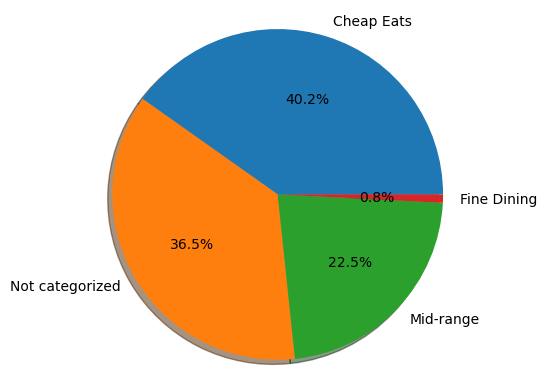

In [52]:
# plotting categorical prices using matplotlib
labels = ['Cheap Eats', 'Not categorized', 'Mid-range', 'Fine Dining']
sizes = [0.402020, 0.364646, 0.225253, 0.008081]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')

plt.show()

In [53]:
#rep: how many cafés per area
df.groupby(["city", "categorical prices"])[["categorical prices"]].count()

categorical prices
city        categorical prices                    
Los Angeles Cheap Eats                         648
            Fine Dining                         54
            Mid-range                          540
            Not categorized                    378

### extracting information  about the best starbucks coffee places around the city 

In [84]:
starbucks  = df.loc[df.address == "Starbucks Coffee"]
starbucks.sort_values(by=['reviews', 'rating'], ascending=False).nlargest(3, "reviews")

,address,location,category,open_close,phone,price range,reviews,rating,review,city,state,postal,stars rating,categorical prices,neg,neu,pos,compound
15,Starbucks Coffee,"Los Angeles, CA 90026",Coffee & Espresso Restaurants,Closed Now,(213) 431-5969,-,0,8.0,Always friendly and coffee is always the best....,Los Angeles,CA,90026,4,Not categorized,0.0,0.726,0.274,0.8271
45,Starbucks Coffee,"Los Angeles, CA 90026",Coffee & Espresso Restaurants,Closed Now,(213) 431-5969,-,0,8.0,Always friendly and coffee is always the best....,Los Angeles,CA,90026,4,Not categorized,0.0,0.726,0.274,0.8271
75,Starbucks Coffee,"Los Angeles, CA 90026",Coffee & Espresso Restaurants,Closed Now,(213) 431-5969,-,0,8.0,Always friendly and coffee is always the best....,Los Angeles,CA,90026,4,Not categorized,0.0,0.726,0.274,0.8271


In [60]:
#pip install nltk
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.downloader.download('vader_lexicon')
import nltk
plt.style.use("ggplot")


In [62]:
df.review[2]
tokens = nltk.word_tokenize(df.review[2])
tokens[:10]

['I',
 'am',
 'about',
 'half',
 'way',
 'through',
 'tasting',
 'EVERYTHING',
 'on',
 'the']

In [63]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('am', 'VBP'),
 ('about', 'IN'),
 ('half', 'JJ'),
 ('way', 'NN'),
 ('through', 'IN'),
 ('tasting', 'VBG'),
 ('EVERYTHING', 'NN'),
 ('on', 'IN'),
 ('the', 'DT')]

In [64]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  am/VBP
  about/IN
  half/JJ
  way/NN
  through/IN
  tasting/VBG
  EVERYTHING/NN
  on/IN
  the/DT
  menu/NN
  ./.
  No/DT
  regrets/NN
  !/.
  One/CD
  of/IN
  my/PRP$
  favorites/NNS
  ..../VBP
  the/DT
  passion/NN
  fruit/NN
  latte/NN
  ./.
  Delicious/JJ
  !/.
  Oh/UH
  ,/,
  and/CC
  by/IN
  the…/NN)


In [85]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#nltk.download('popular')

sid = SentimentIntensityAnalyzer()
#sentiment = sid.polarity_scores("This is the worst thing ever")
#print(sentiment)

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


In [68]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["review"]
    myid = row["address"]
    res[myid] = sid.polarity_scores(text)


  0%|          | 0/1620 [00:00<?, ?it/s]

In [69]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {"index":"address"})
df = df.merge(vaders, how = "left")
df

,address,location,category,open_close,phone,price range,reviews,rating,review,city,state,postal,stars rating,categorical prices,neg,neu,pos,compound
0,Swork Coffee,"Los Angeles, CA 90041",Coffee & Espresso Restaurants,Closed Now,(323) 258-5600,$$,11,7.3,Very nice coffees and service,Los Angeles,CA,90041,4,Mid-range,0.000,0.564,0.436,0.4754
1,Groundwork Coffee Co.,"Los Angeles, CA 90028",Coffee & Espresso Restaurants,Closed Now,(323) 871-0143,$,20,7.6,This is one of the best coffee places in the c...,Los Angeles,CA,90028,4,Cheap Eats,0.000,0.714,0.286,0.8481
2,Primera Taza Coffee House,"Los Angeles, CA 90033",Coffee & Espresso Restaurants,Closed Now,(323) 780-3923,$,0,0.0,I am about half way through tasting EVERYTHING...,Los Angeles,CA,90033,0,Cheap Eats,0.147,0.625,0.228,0.5550
3,The Coffee Bean & Tea Leaf,"Los Angeles, CA 90046",Coffee & Espresso Restaurants,Closed Now,(323) 851-8392,$,15,0.0,"Great place, decent prices, good parking. I en...",Los Angeles,CA,90046,0,Cheap Eats,0.000,0.374,0.626,0.9246
4,Figaro Bistrot,"Los Angeles, CA 90027",Bakeries,Closed Now,(323) 662-1587,$$,174,8.0,Amazing eclectic atmosphere! Excellent food. S...,Los Angeles,CA,90027,4,Mid-range,0.000,0.652,0.348,0.8622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,Klat,"Los Angeles, CA 90005",Coffee & Espresso Restaurants,Closed Now,(213) 674-7776,$$,0,0.0,My first experience at Klat was great. My frie...,Los Angeles,CA,90005,0,Mid-range,0.075,0.769,0.156,0.3400
1616,Cafe De Leche,"Los Angeles, CA 90042",Coffee & Espresso Restaurants,Closed Now,(323) 551-6828,$,13,7.5,"Nice Vibe, interesting coffee options includin...",Los Angeles,CA,90042,4,Cheap Eats,0.069,0.603,0.328,0.7184
1617,Caffe Bene,"Los Angeles, CA 90010",Sandwich Shops,Closed Now,(213) 384-3713,$,0,6.6,Caffe Bene is a great place for hanging out wi...,Los Angeles,CA,90010,3,Cheap Eats,0.000,0.618,0.382,0.9186
1618,Caffe Vita,"Los Angeles, CA 90027",Cafeterias,Closed Now,(323) 663-6340,$$,3,0.0,They have the best organic food in Culver City...,Los Angeles,CA,90027,0,Mid-range,0.000,0.588,0.412,0.9402


### plot vader results


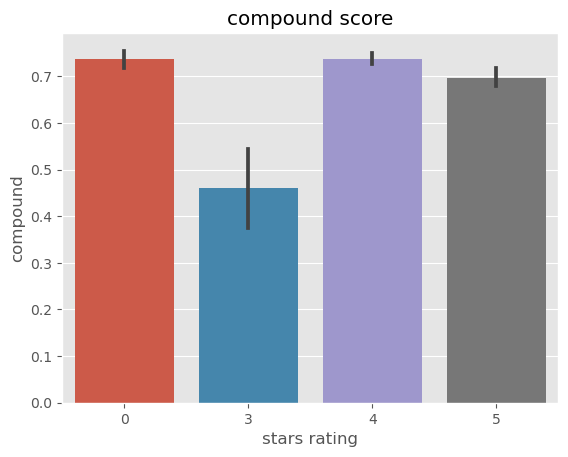

In [71]:
#one star reviews have lower compound sentiment than 5 stars reviews
ax = sns.barplot(data = df, x = "stars rating", y = "compound")
ax.set_title("compound score")
plt.show()

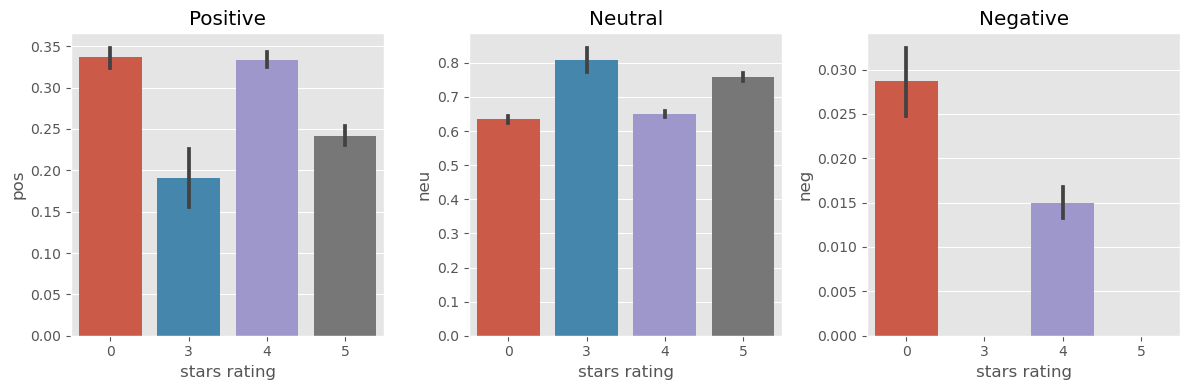

In [72]:
fig, ax = plt.subplots(1, 3, figsize = (12,4))
sns.barplot(data = df, x = "stars rating", y = "pos", ax = ax[0])
sns.barplot(data = df, x = "stars rating", y = "neu", ax = ax[1])
sns.barplot(data = df, x = "stars rating", y = "neg", ax = ax[2])
ax[0].set_title("Positive")
ax[1].set_title("Neutral")
ax[2].set_title("Negative")
plt.tight_layout()
plt.show()

In [73]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["review"]
    myid = row["address"]
    res[myid] = sid.polarity_scores(text)

  0%|          | 0/1620 [00:00<?, ?it/s]

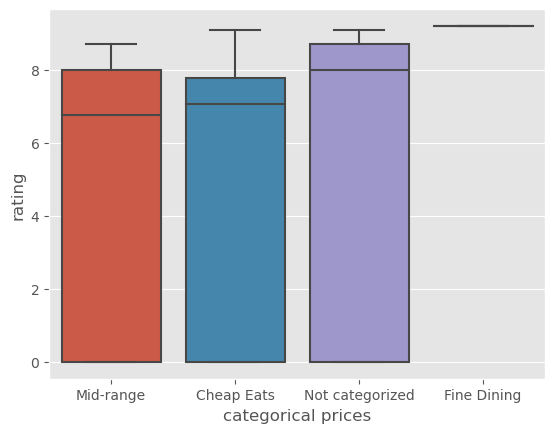

In [76]:
#the priciers and finer, the better the rating 
sns.boxplot(x="categorical prices", y="rating", data=df)
plt.show()

In [77]:
counts = df.groupby('city')[["city"]].value_counts()
counts.sort_values(ascending=False, inplace=True)
counts

city
Los Angeles    1620
dtype: int64

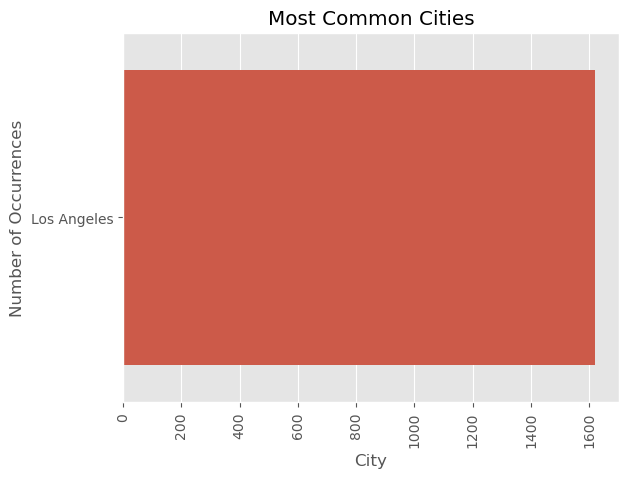

In [78]:
# plot the city counts using barplot
sns.barplot(x = counts.head(10).values, y = counts.head(10).index, orient = "h")

# add labels and title
plt.xlabel('City')
plt.ylabel('Number of Occurrences')
plt.title('Most Common Cities')

# rotate x-axis labels for better readability
plt.xticks(rotation=90)

# show the plot
plt.show()

In [79]:
#pip install --upgrade scikit-learn
from sklearn.decomposition import PCA

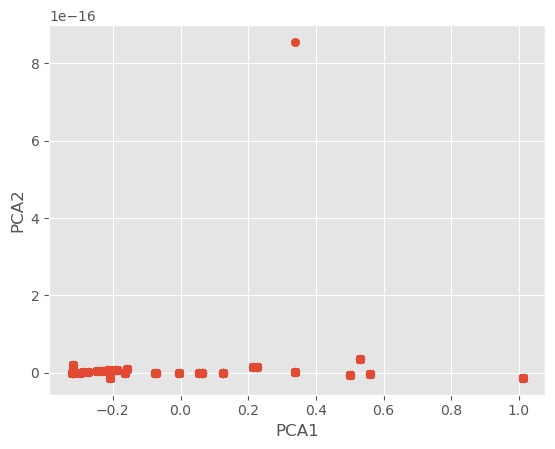

In [80]:
# Extract the 'compound' and 'rating' columns
X = df[['compound', 'compound']].values

# Perform PCA on the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


<AxesSubplot:xlabel='categorical prices', ylabel='rating'>

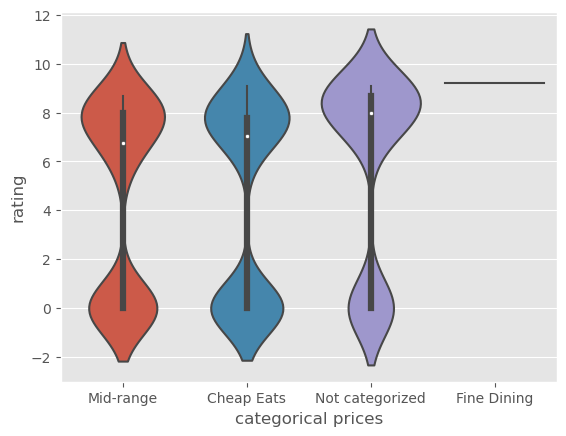

In [81]:
sns.violinplot(data = df, x = "categorical prices", y = "rating")

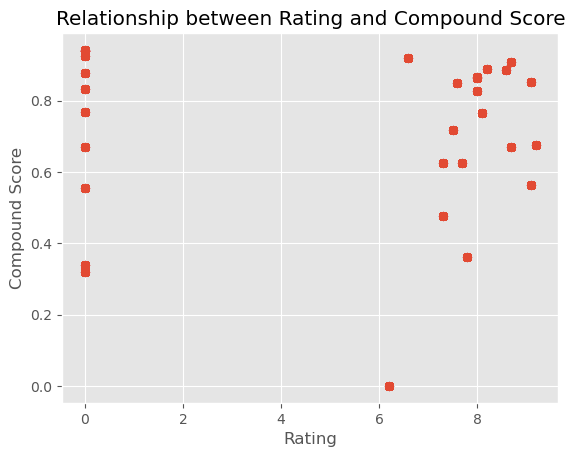

In [82]:
plt.scatter(df["rating"], df['compound'])

# Add labels and title to the plot
plt.xlabel('Rating')
plt.ylabel('Compound Score')
plt.title('Relationship between Rating and Compound Score')

# Show the plot
plt.show()